# Kaggle classification competition (Dogs vs Cats)

Training a CNN to classify a small subset of images in Dogs vs Cats dataset hosted on Kaggle

## The Dogs vs Cats dataset

We will grab the dataset from kaggle and create different folders to manage the train, validation and test sets for cats and dogs.

In [45]:
import os, shutil
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [19]:
#If you want to run this code locally, change this to the path you downloaded your dataset to
orig_dataset_path = '/Users/Kelvin/Desktop/Projects/git/CatsVsDogsCNN/original_dataset/train'

target_loc = '/Users/Kelvin/Desktop/Projects/git/CatsVsDogsCNN/data'
os.mkdir(target_loc)

train_dir = os.path.join(target_loc, 'train')
validation_dir = os.path.join(target_loc, 'validation')
testing_dir = os.path.join(target_loc, 'testing')

dirs_to_create = [train_dir, validation_dir, testing_dir]

for i in range(3):
    os.mkdir(dirs_to_create[i])

categories = ['cats', 'dogs']

for i in range(3):
    for j in range(len(categories)):
        new_dir = os.path.join(dirs_to_create[i], categories[j])
        os.mkdir(new_dir)

cat_picture_names_1_1000 = ['cat.{}.jpg'.format(i) for i in range(1000)]
cat_picture_names_1000_1500 = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
cat_picture_names_1500_2000 = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]

dog_picture_names_1_1000 =  ['dog.{}.jpg'.format(i) for i in range(1000)]
dog_picture_names_1000_1500 = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
dog_picture_names_1500_2000 = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]

for i in range(len(cat_picture_names_1_1000)):
    src = os.path.join(orig_dataset_path, cat_picture_names_1_1000[i])
    dst = os.path.join(train_dir, 'cats')
    dst = os.path.join(dst, cat_picture_names_1_1000[i])
    shutil.copyfile(src, dst)
    
for i in range(len(cat_picture_names_1000_1500)):
    src = os.path.join(orig_dataset_path, cat_picture_names_1_1000[i])
    dst = os.path.join(validation_dir, 'cats')
    dst = os.path.join(dst, cat_picture_names_1000_1500[i])
    shutil.copyfile(src, dst)
    
for i in range(len(cat_picture_names_1500_2000)):
    src = os.path.join(orig_dataset_path, cat_picture_names_1_1000[i])
    dst = os.path.join(testing_dir, 'cats')
    dst = os.path.join(dst, cat_picture_names_1500_2000[i])
    shutil.copyfile(src, dst)
    
for i in range(len(dog_picture_names_1_1000)):
    src = os.path.join(orig_dataset_path, dog_picture_names_1_1000[i])
    dst = os.path.join(train_dir, 'dogs')
    dst = os.path.join(dst, dog_picture_names_1_1000[i])
    shutil.copyfile(src, dst)
    
for i in range(len(dog_picture_names_1000_1500)):
    src = os.path.join(orig_dataset_path, dog_picture_names_1000_1500[i])
    dst = os.path.join(validation_dir, 'dogs')
    dst = os.path.join(dst, dog_picture_names_1000_1500[i])
    shutil.copyfile(src, dst)
    
for i in range(len(dog_picture_names_1500_2000)):
    src = os.path.join(orig_dataset_path, dog_picture_names_1500_2000[i])
    dst = os.path.join(testing_dir, 'dogs')
    dst = os.path.join(dst, dog_picture_names_1500_2000[i])
    shutil.copyfile(src, dst)

Now we have created three separate folders, training, validation, and testing with 2000, 1000, 1000 balanced samples of cats and dogs images respectively

Lets double check that the images are in the correct spots.

In [23]:
train_dog_dir = os.path.join(train_dir, 'dogs')
train_cat_dir = os.path.join(train_dir, 'cats')

validation_dog_dir = os.path.join(validation_dir, 'dogs')
validation_cat_dir = os.path.join(validation_dir, 'cats')

test_dog_dir = os.path.join(testing_dir, 'dogs')
test_cat_dir =os.path.join(testing_dir, 'cats')

print('Number of samples in train_dog:', len(os.listdir(train_dog_dir)))
print('Number of samples in train_cat:', len(os.listdir(train_cat_dir)))

print('Number of samples in validation_dog_dir:', len(os.listdir(validation_dog_dir)))
print('Number of samples in validation_cat_dir:', len(os.listdir(validation_cat_dir)))
      
print('Number of samples in testing_dog_dir:', len(os.listdir(test_dog_dir)))
print('Number of samples in testing_cat_dir:', len(os.listdir(test_cat_dir)))

Number of samples in train_dog: 1000
Number of samples in train_cat: 1000
Number of samples in validation_dog_dir: 500
Number of samples in validation_cat_dir: 500
Number of samples in testing_dog_dir: 500
Number of samples in testing_cat_dir: 500


## Data preprocessing

The data samples are encoded in JPEG and we need to format them into the correct format to feed the images into the neural network. Essentially, we need to perform the following:

    - 1) Read the picture files
    - 2) Decode the JPEG files into RGB grids of pixels
    - 3) Convert into floating point tensors.
    - 4) Rescale pixel values into [0,1] intervals

In [38]:
#Rescale data in images 
train_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_data_gen.flow_from_directory(
    train_dir, 
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')

validation_generator = test_data_gen.flow_from_directory(
    validation_dir,
    target_size = (150, 150), 
    batch_size = 20, 
    class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
for data, label in train_generator:
    print('Data shape from generator: ', data.shape)
    print('label shape from generator: ', label.shape)
    break

Data shape from generator:  (20, 150, 150, 3)
label shape from generator:  (20,)


It seems like the generator is working. It is creating batches of 20 samples of 150,150,3 with the corresponding labels.

## Model Definition

In [40]:
model = models.Sequential()
# By default Max pooling layers are 2x2 in size
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
#Now we will define a flatten layer, followed by two densely connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [42]:
model.compile(optimizer = optimizers.rmsprop(lr=1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

In [44]:
history = model.fit_generator(train_generator, steps_per_epoch = 2000//20, epochs = 30, validation_data = validation_generator, validation_steps = 1000//20)

Epoch 1/30
100/100 [==============================] - 154s 2s/step - loss: 0.4186 - acc: 0.8130 - val_loss: 0.4678 - val_acc: 0.7910
Epoch 2/30
100/100 [==============================] - 159s 2s/step - loss: 0.3921 - acc: 0.8315 - val_loss: 0.4935 - val_acc: 0.7710
Epoch 3/30
100/100 [==============================] - 172s 2s/step - loss: 0.3705 - acc: 0.8395 - val_loss: 0.4313 - val_acc: 0.8070
Epoch 4/30
100/100 [==============================] - 177s 2s/step - loss: 0.3390 - acc: 0.8535 - val_loss: 0.4206 - val_acc: 0.8040
Epoch 5/30
100/100 [==============================] - 162s 2s/step - loss: 0.3208 - acc: 0.8605 - val_loss: 0.4070 - val_acc: 0.8190
Epoch 6/30
100/100 [==============================] - 178s 2s/step - loss: 0.2991 - acc: 0.8770 - val_loss: 0.3996 - val_acc: 0.8240
Epoch 7/30
100/100 [==============================] - 160s 2s/step - loss: 0.2755 - acc: 0.8810 - val_loss: 0.4742 - val_acc: 0.7980
Epoch 8/30
100/100 [==============================] - 156s 2s/step - 

In [46]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

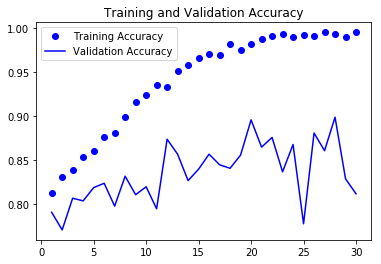

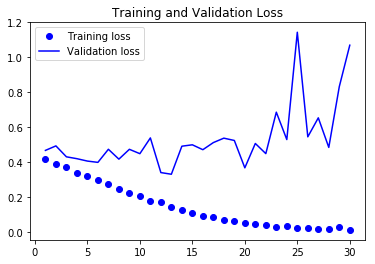

In [56]:
acc = history.history['acc']
loss = history.history['loss']

validation_acc = history.history['val_acc']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, validation_acc, 'b', label = "Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, validation_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
